### Notebook to prepare the full north dataset used for training of different models, combining different code throughout this repo


In [42]:
# Importing Libraries

import pandas as pd
import healpy as hp
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from desiutil.plots import plot_sky_binned, plot_healpix_map


In [43]:
# Defining important metrics and functions

# Setting NSIDE values
NSIDE = 512
NPIX = hp.nside2npix(NSIDE)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)
print(
    "Approximate pix area at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2pixarea(NSIDE, degrees=True)))

def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))


Approximate resolution at NSIDE 512 is 0.11 deg
Approximate pix area at NSIDE 512 is 0.013 deg


### 1. Get a catalogue of all objects in the Galaxy Survey and prepare the north area

### NORTH

In [44]:
df_north = pd.read_csv('../../bricks_data/galaxy_catalogue_north.csv',
                       dtype={'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8', 'GLBG':'int8','RLBG':'int8'})

In [45]:
df_north = df_north.drop_duplicates()

In [46]:
print(df_north.isna().sum())

RA      0
DEC     0
LRG     0
ELG     0
QSO     0
GLBG    0
RLBG    0
dtype: int64


In [47]:
# Removing all Lines with Nan that were added to ensure that all bricks are stored
df_north = df_north.dropna(axis=0, inplace=False, how='any')

print(len(df_north))

38033493


In [48]:
df_north.head()

,RA,DEC,LRG,ELG,QSO,GLBG,RLBG
0,262.373791,60.676516,0,1,0,0,0
1,262.374722,60.660621,0,1,0,0,0
2,262.375123,60.812241,1,0,0,0,0
3,262.376286,60.633218,0,0,0,1,0
4,262.376583,60.723814,0,0,0,0,1


### 2. Get Galaxy Count per Healpy Pixel


In [49]:
# LRG

df_LRG = df_north[df_north["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)
mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_lrg = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_lrg.pixel_id = df_lrg.pixel_id.astype(int)

Number of LRGs in Sample: 3326485
Mean LRGs per Pixel: 8.56394604934235


In [50]:
# elg

df_ELG = df_north[df_north["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

print("Number of ELGs in Sample:", len(ra_ELG))

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)
mean_ELG = counts.mean()
print("Mean ELGs per Pixel:", mean_ELG)
# Calculating Densities for every block
#density_ELG = (counts / mean_ELG) - 1
id_density = np.stack((unique, counts), axis=1)
df_elg = pd.DataFrame(id_density, columns=['pixel_id', 'elg'])
df_elg.pixel_id = df_elg.pixel_id.astype(int)

Number of ELGs in Sample: 12187120
Mean ELGs per Pixel: 31.283838938716418


In [51]:
df_QSO = df_north[df_north["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

print("Number of QSOs in Sample:", len(ra_QSO))

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)
mean_QSO = counts.mean()
print("Mean QSOs per Pixel:", mean_QSO)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
df_qso = pd.DataFrame(id_density, columns=['pixel_id', 'qso'])
df_qso.pixel_id = df_qso.pixel_id.astype(int)

Number of QSOs in Sample: 1727402
Mean QSOs per Pixel: 4.530866723322108


In [52]:
df_GLBG = df_north[df_north["GLBG"] == 1]
ra_GLBG = df_GLBG["RA"].to_numpy(copy=True)
dec_GLBG = df_GLBG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_GLBG, dec_GLBG)

print("Number of GLBGs in Sample:", len(ra_GLBG))

GLBG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(GLBG_pixel_indices, return_counts=True)
mean_GLBG = counts.mean()
print("Mean GLBGs per Pixel:", mean_GLBG)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
df_glbg = pd.DataFrame(id_density, columns=['pixel_id', 'glbg'])
df_glbg.pixel_id = df_glbg.pixel_id.astype(int)

Number of GLBGs in Sample: 11974587
Mean GLBGs per Pixel: 30.7387488448506


In [53]:

df_RLBG = df_north[df_north["RLBG"] == 1]
ra_RLBG = df_RLBG["RA"].to_numpy(copy=True)
dec_RLBG = df_RLBG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_RLBG, dec_RLBG)

print("Number of RLBGs in Sample:", len(ra_RLBG))

RLBG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(RLBG_pixel_indices, return_counts=True)
mean_RLBG = counts.mean()
print("Mean RLBGs per Pixel:", mean_RLBG)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
df_rlbg = pd.DataFrame(id_density, columns=['pixel_id', 'rlbg'])
df_rlbg.pixel_id = df_rlbg.pixel_id.astype(int)

Number of RLBGs in Sample: 9794363
Mean RLBGs per Pixel: 25.143601249688732


In [54]:
df_north = pd.merge(df_lrg, df_elg, how='outer', on='pixel_id')
df_north = pd.merge(df_north, df_qso, how='outer', on='pixel_id')
df_north = pd.merge(df_north, df_glbg, how='outer', on='pixel_id')
df_north = pd.merge(df_north, df_rlbg, how='outer', on='pixel_id')

print(len(df_north))

389708


In [55]:
# Dropping all pixels where I do not have counts for all 3 types of galaxies
df_north.fillna(value=0, inplace=True)
print(df_north.isna().sum())
print(df_north.shape)

pixel_id    0
lrg         0
elg         0
qso         0
glbg        0
rlbg        0
dtype: int64
(389708, 6)


### 3. Plotting Galaxy Densities

0.0 180.0 -180.0 180.0


"m_LRG = np.zeros(NPIX)\n\nra, dec = hp.pix2ang(NSIDE, range(NPIX), lonlat=True)\nm_LRG[df_north.pixel_id.to_numpy()] = df_north.lrg.to_numpy()\nm_LRG = m_LRG.astype(float)\nmask = (m_LRG == 0.0)\nm_LRG[mask] = np.nan\n\nax = plot_sky_binned(ra, dec, data=m_LRG, cmap='jet', label='Number of LRG per pixel', plot_type='healpix',\n                     verbose=True, max_bin_area=1.5)"

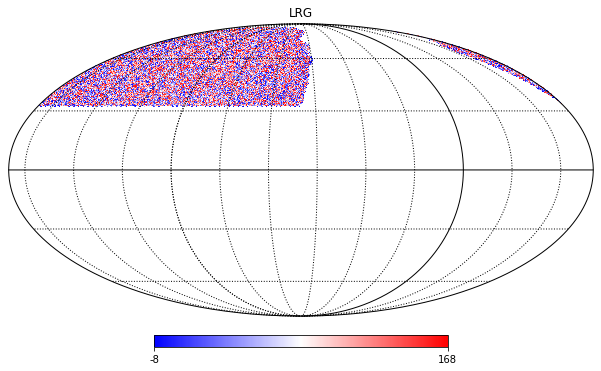

In [56]:
m_LRG = np.zeros(NPIX)

m_LRG[df_north.pixel_id.to_numpy()] = df_north.lrg.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)


hp.graticule()

"""m_LRG = np.zeros(NPIX)

ra, dec = hp.pix2ang(NSIDE, range(NPIX), lonlat=True)
m_LRG[df_north.pixel_id.to_numpy()] = df_north.lrg.to_numpy()
m_LRG = m_LRG.astype(float)
mask = (m_LRG == 0.0)
m_LRG[mask] = np.nan

ax = plot_sky_binned(ra, dec, data=m_LRG, cmap='jet', label='Number of LRG per pixel', plot_type='healpix',
                     verbose=True, max_bin_area=1.5)"""

0.0 180.0 -180.0 180.0


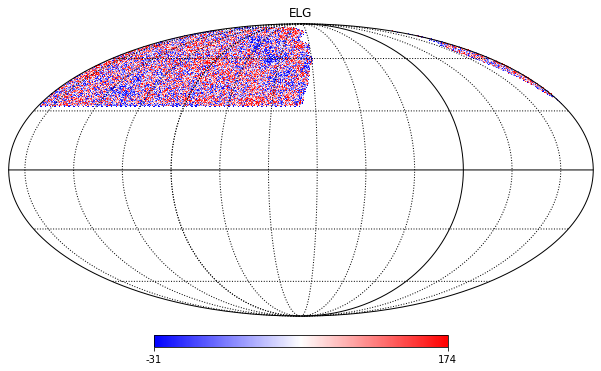

In [57]:
m_ELG = np.zeros(NPIX)

m_ELG[df_north.pixel_id.to_numpy()] = df_north.elg.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


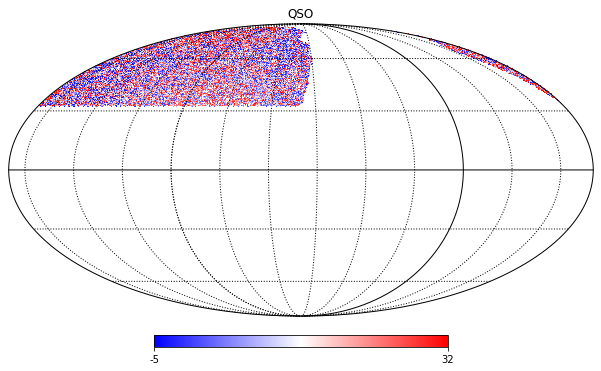

In [58]:
m_QSO = np.zeros(NPIX)

m_QSO[df_north.pixel_id.to_numpy()] = df_north.qso.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


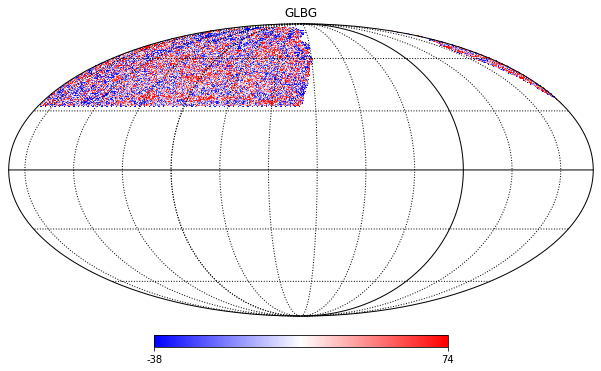

In [59]:
m_GLBG = np.zeros(NPIX)

m_GLBG[df_north.pixel_id.to_numpy()] = df_north.glbg.to_numpy()
mask = (m_GLBG == 0)
m_GLBG[mask] = np.nan
hp.mollview(m_GLBG, title="GLBG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


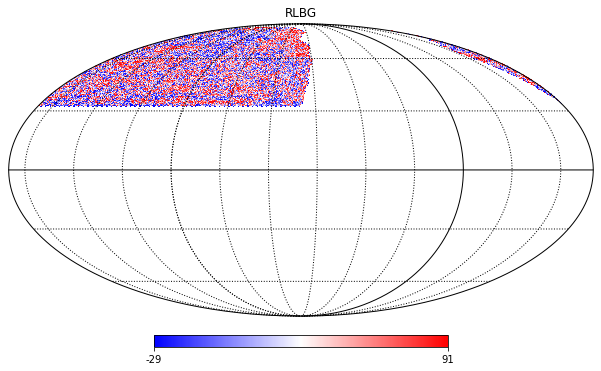

In [60]:
m_RLBG = np.zeros(NPIX)

m_RLBG[df_north.pixel_id.to_numpy()] = df_north.rlbg.to_numpy()
mask = (m_RLBG == 0)
m_RLBG[mask] = np.nan
hp.mollview(m_RLBG, title="RLBG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [61]:
# Getting Exposure Densities across pixels


# TODODODODO - Try out both - exposure inclusive and uninclusive

with open(f'../../bricks_data/pixel2ccd_{NSIDE}.pickle', 'rb') as f:
    pixel2ccd_dict = pickle.load(f)
    f.close()

"""with open(f'../../bricks_data/pixel2ccd_{NSIDE}_non_inclusive.pickle', 'rb') as f:
    pixel2ccd_dict_non_incl = pickle.load(f)
    f.close()"""


"with open(f'../../bricks_data/pixel2ccd_{NSIDE}_non_inclusive.pickle', 'rb') as f:\n    pixel2ccd_dict_non_incl = pickle.load(f)\n    f.close()"

In [62]:
df_north = df_north.astype(int)
df_north.head()



,pixel_id,lrg,elg,qso,glbg,rlbg
0,6477,1,1,0,2,1
1,6478,2,6,0,10,13
2,6479,1,10,0,5,4
3,6481,1,16,3,18,3
4,6482,1,7,1,11,4


In [63]:
pix_ids = df_north.pixel_id.to_numpy()
exp_len = np.zeros(len(pix_ids))
for i, pix in enumerate(pix_ids):
    exp_len[i] = len(pixel2ccd_dict[pix])
df_north['exposures'] = exp_len

In [64]:
df_north = df_north.astype(int)

0.0 180.0 -180.0 180.0


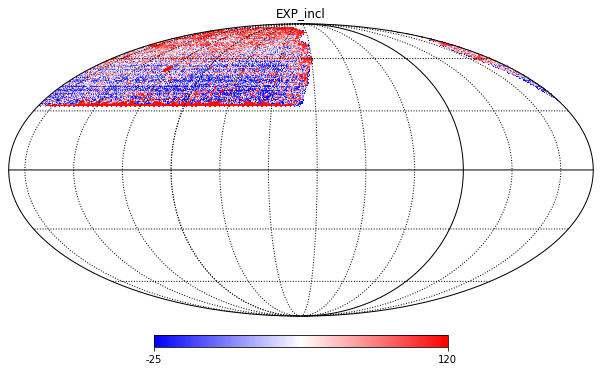

In [65]:
m_EXP = np.zeros(NPIX)

m_EXP[df_north.pixel_id.to_numpy()] = df_north.exposures.to_numpy()
mask = (m_EXP == 0)
m_EXP[mask] = np.nan
hp.mollview(m_EXP, title="EXP_incl", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

### 4. Importing the Systematics Values and Appending them to the df.


#### a. Stellar Density

In [66]:
# Import New Systematics here --> maps by Boris
m_hinh = hp.read_map("../../bricks_data/systematics_maps/HINH_512_NEST.fits")
m_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")
m_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")
m_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")

m_hinh = hp.reorder(map_in=m_hinh, n2r=True)
m_gaia = hp.reorder(map_in=m_gaia, n2r=True)
m_gaia12 = hp.reorder(map_in=m_gaia12, n2r=True)
m_sagitarius = hp.reorder(map_in=m_sagitarius, n2r=True)

unique = np.arange(NPIX)

id_density = np.stack((unique, m_hinh, m_gaia, m_gaia12, m_sagitarius), axis=1)

df_hinh = pd.DataFrame(id_density, columns=['pixel_id', 'hinh','gaia', 'gaia12', 'sagitarius'])
df_hinh.pixel_id = df_hinh.pixel_id.astype(int)

df_north = pd.merge(df_north, df_hinh, how='inner', on='pixel_id')

In [67]:

#Plot all stellar maps across the full sky
"""m_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")
mask = (m_gaia == 0)
m_gaia[mask] = np.nan
hp.mollview(m_gaia, title="gaia", format='%i', nest=True, norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

m_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")

mask = (m_sagitarius == 0)
m_sagitarius[mask] = np.nan
hp.mollview(m_sagitarius, title="sagitarius", nest=True, format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

m_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")
mask = (m_gaia12 == 0)
m_gaia12[mask] = np.nan
hp.mollview(m_gaia12, title="gaia12lt", format='%i', nest=True, norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

m_hinh = hp.read_map("../../bricks_data/systematics_maps/HINH_512_NEST.fits")

mask = (m_hinh == 0)
m_hinh[mask] = np.nan
hp.mollview(m_hinh, title="hinh", nest=True, format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()"""

'm_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")\nmask = (m_gaia == 0)\nm_gaia[mask] = np.nan\nhp.mollview(m_gaia, title="gaia", format=\'%i\', nest=True, norm=\'hist\', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor=\'white\',\n            remove_dip=True, remove_mono=True)\nhp.graticule()\n\nm_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")\n\nmask = (m_sagitarius == 0)\nm_sagitarius[mask] = np.nan\nhp.mollview(m_sagitarius, title="sagitarius", nest=True, format=\'%i\', norm=\'hist\', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor=\'white\',\n            remove_dip=True, remove_mono=True)\nhp.graticule()\n\nm_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")\nmask = (m_gaia12 == 0)\nm_gaia12[mask] = np.nan\nhp.mollview(m_gaia12, title="gaia12lt", format=\'%i\', nest=True, norm=\'hist\', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor=\'wh

In [ ]:
m_hinh = np.zeros(NPIX)

m_hinh[df_north.pixel_id.to_numpy()] = df_north.hinh.to_numpy()
mask = (m_hinh == 0)
m_hinh[mask] = np.nan
hp.mollview(m_hinh, title="HINH", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()


In [ ]:
m_gaia = np.zeros(NPIX)

m_gaia[df_north.pixel_id.to_numpy()] = df_north.gaia.to_numpy()
mask = (m_gaia == 0)
m_gaia[mask] = np.nan
hp.mollview(m_gaia, title="gaia", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()


In [ ]:
m_gaia12 = np.zeros(NPIX)

m_gaia12[df_north.pixel_id.to_numpy()] = df_north.gaia12.to_numpy()
mask = (m_gaia12 == 0)
m_gaia12[mask] = np.nan
hp.mollview(m_gaia12, title="gaia12", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()



In [ ]:
m_sagitarius = np.zeros(NPIX)

m_sagitarius[df_north.pixel_id.to_numpy()] = df_north.sagitarius.to_numpy()
mask = (m_sagitarius == 0)
m_sagitarius[mask] = np.nan
hp.mollview(m_sagitarius, title="sagitarius", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()



In [ ]:
print(len(df_north))

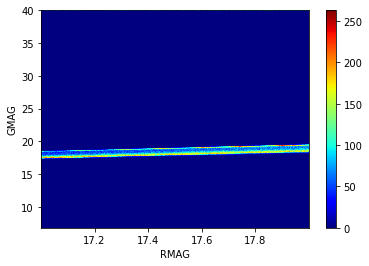

In [68]:
# ToDo: Adapt here to read different metrics and sys maps

df_stellar = pd.read_csv('../../bricks_data/stellar_catalogue_north.csv')

label_1 = 'RMAG'
label_2 = 'GMAG'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [69]:
# REMOVING OUTLIERS
print(df_stellar.shape)

(3831097, 5)


In [70]:
df_stellar['GMR'] = df_stellar['GMAG'] - df_stellar['RMAG']
df_stellar['RMZ'] = df_stellar['RMAG'] - df_stellar['ZMAG']

In [71]:
df_stellar = df_stellar[(df_stellar['GMAG'] > 15) & (df_stellar['GMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['ZMAG'] > 15) & (df_stellar['ZMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['GMR'] > -2) & (df_stellar['GMR'] < 4)]
df_stellar = df_stellar[(df_stellar['RMZ'] > -2) & (df_stellar['RMZ'] < 4)]
print(df_stellar.shape)


(3464029, 7)


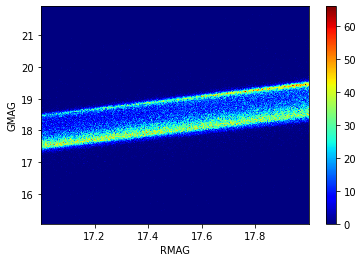

In [72]:
plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()


In [73]:
#Dividing RMAG Column into 1000 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_RMAG'] = pd.qcut(df_stellar['RMAG'], q=1000, labels=False)
df_stellar['percent_RMAG'].value_counts()


927    3478
963    3477
921    3477
407    3476
774    3476
       ... 
775    3453
704    3453
408    3452
349    3452
928    3450
Name: percent_RMAG, Length: 1000, dtype: int64

In [74]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMAG')
zscore = lambda x: abs((x - x.median()) / x.std())
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [75]:
#Dividing RMAG Column into 100 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_GMR'] = pd.qcut(df_stellar['GMR'], q=1000, labels=False)
df_stellar['percent_RMZ'] = pd.qcut(df_stellar['RMZ'], q=1000, labels=False)
df_stellar.shape

(3464029, 12)

In [76]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_GMR')
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)


In [77]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMZ')
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [78]:
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_GMR'] < 3)]
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_RMZ'] < 3)]
df_stellar.shape

(3464029, 12)
(3436156, 12)


(3414224, 12)

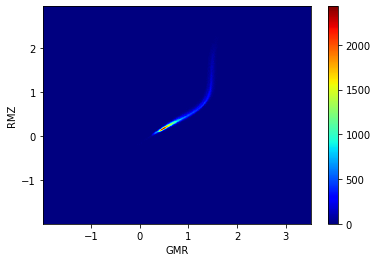

In [79]:
label_1 = 'GMR'
label_2 = 'RMZ'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [80]:
ra_stellar = df_stellar["RA"].to_numpy(copy=True)
dec_stellar = df_stellar["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_stellar, dec_stellar)

print("Number of stellars in Sample:", len(ra_stellar))

stellar_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(stellar_pixel_indices, return_counts=True)
mean_stellar = counts.mean()
print("Mean stellars per Pixel:", mean_stellar)
# Calculating Densities for every block
density_stellar = (counts / mean_stellar) - 1
id_density = np.stack((unique, counts), axis=1)
df_stellar = pd.DataFrame(id_density, columns=['pixel_id', 'stellar'])
df_stellar.pixel_id = df_stellar.pixel_id.astype(int)


Number of stellars in Sample: 3414224
[   6481    6482    6483 ... 1616869 1616870 1616874]
Mean stellars per Pixel: 8.732053023153512
[[   6481       2]
 [   6482       1]
 [   6483       2]
 ...
 [1616869       1]
 [1616870       2]
 [1616874       1]]
   pixel_id  stellar
0      6481        2
1      6482        1
2      6483        2
3      6484        3
4      6485        2
pixel_id    0
stellar     0
dtype: int64


In [81]:
df_north = df_north.merge(df_stellar, how='left', on='pixel_id')
df_north.fillna(value=0)

print(df_north.isna().sum())

389708
389708
pixel_id         0
lrg              0
elg              0
qso              0
glbg             0
rlbg             0
exposures        0
hinh             0
gaia             0
gaia12           0
sagitarius       0
stellar       6733
dtype: int64


(389708, 12)

In [ ]:
df_north.head()

In [ ]:
m_Stellar = np.zeros(NPIX)

m_Stellar[df_north.pixel_id.to_numpy()] = df_north.stellar.to_numpy()
mask = (m_Stellar == 0)
m_Stellar[mask] = np.nan
hp.mollview(m_Stellar, title="Stellar", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()

#### EBV Extraction

In [ ]:
from astropy.coordinates import SkyCoord, Latitude, Longitude
from dustmaps.sfd import SFDQuery

In [ ]:
from dustmaps.config import config

config['data_dir'] = '/Users/edgareggert/astrostatistics/data_preprocessing/.dustmapsrc'

In [ ]:
## Getting the centers of each pixel in my corpus as RaDec

pixels_ids = df_north["pixel_id"].to_numpy()
subpixel_coords = hp.pix2ang(NSIDE, pixels_ids, lonlat=True)
ra_ebv = subpixel_coords[0]
dec_ebv = subpixel_coords[1]

In [ ]:
#Querying their position on the SFD dustmap
sfd = SFDQuery()
coords = SkyCoord(ra_ebv, dec_ebv, frame='icrs', unit='deg')
ebv = sfd(coords)

df_north["EBV"] = ebv

In [ ]:
df_north.EBV.describe()
df_north.head()


In [ ]:
m_EBV = np.zeros(NPIX)

m_EBV[df_north.pixel_id.to_numpy()] = df_north.EBV.to_numpy()
mask = (m_EBV == 0)
m_EBV[mask] = np.nan
hp.mollview(m_EBV, title="EBV", format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [ ]:
df_north.exposures = df_north.exposures.astype(int)
df_north.head()




### Work in Coverage Stats and Other Systematics

In [ ]:
m_coverage = hp.read_map("../../bricks_data/masks/mask_512.fits")
m_coverage = hp.reorder(map_in=m_coverage, n2r=True)

unique = np.arange(NPIX)

id_density = np.stack((unique, m_coverage), axis=1)

df_bad_pix = pd.DataFrame(id_density, columns=['pixel_id', 'coverage'])
df_bad_pix.pixel_id = df_bad_pix.pixel_id.astype(int)
df_bad_pix = df_bad_pix[df_bad_pix.coverage == 1]


In [ ]:
m_cover = np.zeros(NPIX)

m_cover[df_bad_pix.pixel_id.to_numpy()] = df_bad_pix.coverage.to_numpy()
mask = (m_cover < 1)
m_cover[mask] = np.nan
hp.mollview(m_cover, title="Coverage", format='%e', norm='hist', cmap="viridis", notext=False, rot=(0, 0, 0), badcolor='gray',
            remove_dip=True, remove_mono=True)
hp.graticule()


In [ ]:
df_north = pd.merge(df_north, df_bad_pix, how='inner', on='pixel_id')

In [ ]:
with open('../../bricks_data/pixel2systematics_geometric_512_2048_inclusive.pickle', 'rb') as f:
    geo_dict_inc = pickle.load(f)
    f.close()

print(len(geo_dict_inc.keys()))

In [ ]:
sys_list = []
for key in geo_dict_inc.keys():
    ind_sys_list = geo_dict_inc[key]
    ind_sys_list.append(key)
    sys_list.append(ind_sys_list)

df_sys_geo_inc = pd.DataFrame(sys_list, columns=['airmass',
                                                'ccdskysb_g',
                                                'ccdskysb_r',
                                                'ccdskysb_z',
                                                'exptime_g',
                                                'exptime_r',
                                                'exptime_z',
                                                'meansky_g',
                                                'meansky_r',
                                                'meansky_z',
                                                'galdepth_g',
                                                'galdepth_r',
                                                'galdepth_z',
                                                'seeing_g',
                                                'seeing_r',
                                                'seeing_z',
                                                'psfdepth_g',
                                                'psfdepth_r',
                                                'psfdepth_z',
                                                'psfnorm_mean_g',
                                                'psfnorm_mean_r',
                                                'psfnorm_mean_z',
                                                'gausspsfdepth_g',
                                                'gausspsfdepth_r',
                                                'gausspsfdepth_z',
                                                'pixel_covered',
                                                'pixel_id'])



In [ ]:
# Experimental: Cut and plot all pixels that are not covered sufficiently

m_frac = np.zeros(NPIX)

m_frac[df_sys_geo_inc.pixel_id.to_numpy()] = df_sys_geo_inc.pixel_covered
mask = (m_frac == 0)
m_frac[mask] = np.nan
hp.mollview(m_frac, title="Coverage of Pixels in full dataset", format='%e', cmap="viridis", notext=False, rot=(0, 0, 0), badcolor='gray',
            remove_dip=True, remove_mono=True)
hp.graticule()



In [ ]:

df_north = df_north.merge(df_sys_geo_inc, how='inner', on='pixel_id')
print(len(df_north))

In [ ]:
df_north.dropna(axis=0, inplace=True)

In [ ]:
cols = list(df_north.columns)
cols.remove('pixel_id')


In [ ]:
nrows = 39
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200, 200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_north.pixel_id.to_numpy()] = df_north[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), format='%e', norm='hist', cmap="bwr", notext=False,
                rot=(120, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()



In [ ]:
df_north.describe()

In [ ]:
### Removing all pixels from the other corpus


df_north['RA'], df_north['DEC'] = hp.pix2ang(nside=NSIDE, ipix=df_north.pixel_id.to_numpy(), lonlat=True)

df_north.head()
df_no_island = df_north[df_north.DEC < 15]

df_comp = df_north[df_north.DEC > 20]

m = np.zeros(NPIX)

m[df_no_island.pixel_id.to_numpy()] = 100
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='Cut area', format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)

In [ ]:
m = np.zeros(NPIX)

m[df_comp.pixel_id.to_numpy()] = df_comp['pixel_covered'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures', format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)


In [ ]:
#### Removing All Outliers


In [ ]:
m = np.zeros(NPIX)

m[df_no_island.pixel_id.to_numpy()] = 100
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='Cut area', format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)

In [ ]:
m = np.zeros(NPIX)

m[df_comp.pixel_id.to_numpy()] = df_comp['pixel_covered'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures', format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)


#### Removing All Outliers


In [ ]:
col = list(df_comp.columns)
print(col)

In [ ]:
df_no_outlier = df_comp.drop(columns=['galdepth_g',
                                      'galdepth_r',
                                      'galdepth_z',
                                      'psfdepth_g',
                                      'psfdepth_r',
                                      'psfdepth_z',
                                      'psfnorm_mean_g',
                                      'psfnorm_mean_r',
                                      'psfnorm_mean_z',
                                      'gausspsfdepth_g',
                                      'gausspsfdepth_r',
                                      'gausspsfdepth_z',
                                      'RA',
                                      'DEC'])

col = list(df_no_outlier.columns)
print(col)

In [ ]:
factor = 7
print(len(df_no_outlier))
for elem in col:
    if elem == 'stellar':
        factor = 7
    df_no_outlier['Z'] = df_no_outlier[elem].transform(zscore)
    print("Element: ", elem, "| No of Elems with Z higher than factor  : ",
          len(df_no_outlier[(df_no_outlier['Z'] > factor)]))
    df_no_outlier = df_no_outlier[(df_no_outlier['Z'] < factor)]

print()
print(f"Galaxies Remaining before outlier removal: {len(df_comp)}")
print(f"Galaxies Remaining after outlier removal: {len(df_no_outlier)}")
print(f"Elements cut by outlier removal: {len(df_comp) - len(df_no_outlier)}")

col = list(df_no_outlier.columns)
col.remove('pixel_id')
col.remove('Z')
print(len(col))
df_noout = df_no_outlier
nrows = 20
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(150,150))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = col[i]
    df_noout['Z'] = df_no_outlier[elem].transform(zscore)

    df_outlier = df_noout[(df_noout['Z'] > 7)]

    m = np.zeros(NPIX)

    m[df_outlier.pixel_id.to_numpy()] = 1
    mask = (m == 0)
    m[mask] = np.nan

    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), min=-5, max=2, cbar=False, cmap="Reds", notext=False,
                rot=(120, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

In [ ]:
#df_no_outlier = df_geo

#df_no_outlier.describe()
print(df_no_outlier.shape)
print(df_no_outlier.exposures.max())
print(df_no_outlier.exposures.mean())
print(df_no_outlier.exposures.median())
print(len(df_no_outlier[df_no_outlier.exposures > 150]))
print(len(df_no_outlier[df_no_outlier.pixel_covered < 0.9]))



plt.hist(df_no_outlier.exposures)


In [ ]:
print(len(df_no_outlier[df_no_outlier.exposures < 7]))


In [ ]:
df_no_outlier = df_no_outlier[df_no_outlier.exposures < 150]
df_no_outlier = df_no_outlier[df_no_outlier.pixel_covered > 0.9]
print(df_no_outlier.shape)

df_no_outlier.exposures.max()


df_no_outlier = df_no_outlier.drop(columns=['pixel_covered'])

### Scaling the Data

In [ ]:
scaler = MinMaxScaler()
#scaler = RobustScaler()

df_scaled = df_no_outlier

cololo = list(df_scaled.columns)

print(cololo)
cololo.remove('pixel_id')


cololo.remove('lrg')
cololo.remove('elg')
cololo.remove('qso')
cololo.remove('glbg')
cololo.remove('rlbg')

"""df_scaled['lrg'] = (df_scaled['lrg']/df_scaled.lrg.mean()) - 1
df_scaled['elg'] = (df_scaled['elg']/df_scaled.elg.mean()) - 1
df_scaled['qso'] = (df_scaled['qso']/df_scaled.qso.mean()) - 1

df_scaled.describe()
"""

df_scaled[cololo] = scaler.fit_transform(df_no_outlier[cololo])

df_scaled.describe()



In [ ]:
from desiutil.plots import plot_sky_binned

ra, dec = hp.pix2ang(NSIDE, df_scaled.pixel_id,lonlat=True)

ax = plot_sky_binned(ra,dec,data=df_scaled.lrg ,cmap='bwr',label='lrg', plot_type='grid', verbose=True,max_bin_area=0.5)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.elg ,cmap='bwr',label='elg', plot_type='grid', verbose=True,max_bin_area=0.5)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.qso ,cmap='bwr',label='qso', plot_type='grid', verbose=True,max_bin_area=0.5)

ax = plot_sky_binned(ra,dec,data=df_scaled.glbg ,cmap='bwr',label='qso', plot_type='grid', verbose=True,max_bin_area=0.5)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.rlbg ,cmap='bwr',label='rlbg', plot_type='grid', verbose=True,max_bin_area=0.5)

In [108]:
df_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=666, shuffle=True)

print(df_train.head())
print(df_test.head())
print(len(df_train))
print(len(df_test))


        pixel_id  lrg  elg  qso      glbg      rlbg  exposures      hinh  \
121654    230905    5   36    4  0.366972  0.336957   0.285714  0.280556   
72497     143939    7   45    7  0.376147  0.336957   0.257143  0.236670   
312412    591695    3   37    5  0.165138  0.293478   0.171429  0.047754   
227732    426640    7   26    3  0.183486  0.054348   0.285714  0.126232   
369947    707078    4   42    3  0.357798  0.239130   0.400000  0.268844   

            gaia    gaia12  ...  ccdskysb_z  exptime_g  exptime_r  exptime_z  \
121654  0.325301  0.239024  ...    0.382624   0.436717   0.612677   0.589741   
72497   0.265060  0.265854  ...    0.413695   0.677481   0.417162   0.792168   
312412  0.060241  0.060976  ...    0.598698   0.184325   0.197283   0.483801   
227732  0.060241  0.100000  ...    0.488536   0.389990   0.527508   0.462351   
369947  0.445783  0.507317  ...    0.659025   0.402856   0.409929   0.580763   

        meansky_g  meansky_r  meansky_z  seeing_g  seeing_r  s

In [109]:
df_train.to_csv('../../bricks_data/north.csv', index=False)
df_test.to_csv('../../bricks_data/north_test.csv', index=False)